In [2]:
# -*- coding: utf-8 -*-
from datetime import datetime, date, timedelta

import pandas as pd
from pandas.core.frame import DataFrame

from models.settings import settings
from datetime import datetime

import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.frame import DataFrame

import numpy as np

from utils.utils import strip_dataframe_empty_string
from utils.hr import cal_working_month, cal_working_month_level
np.random.seed(0) 
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS", "SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [3]:
dimission_2022_raw_data = pd.read_csv(
    "data/dimission/dimission _2022.csv",
    index_col=False,
    keep_default_na=False,
    encoding="utf-8",
    dtype="str"
)

In [4]:
dimission_2022_data = strip_dataframe_empty_string(dimission_2022_raw_data)

In [5]:
dimission_2022_data.per_lzrq = pd.to_datetime(dimission_2022_data.per_lzrq)
dimission_2022_data.per_outrq = pd.to_datetime(dimission_2022_data.per_outrq)
dimission_2022_data["per_enroll_date"] = dimission_2022_data.per_lzrq.apply(lambda x: x.date())
dimission_2022_data["per_resign_date"] = dimission_2022_data.per_outrq.apply(lambda x: x.date())
dimission_2022_data["working_month"] = dimission_2022_data.apply(lambda x: cal_working_month(x['per_enroll_date'], x.per_resign_date),axis=1)
dimission_2022_data["working_month_level"] = dimission_2022_data["working_month"].apply(cal_working_month_level)


In [6]:
rixin_dimission_2022_data = dimission_2022_data.query("per_jxfs == '日薪' & per_outfs != '黑名单' & per_outfs != '外调' & per_outfs != '用掉'")


In [7]:
rixin_dimission_2022_data_group = (
        rixin_dimission_2022_data[["working_month", "ryid"]]
        .groupby(["working_month"])
        .count()
    )

In [8]:
rixin_dimission_2022_data_working_month_level_group = (
        rixin_dimission_2022_data[["working_month_level", "ryid"]]
        .groupby(["working_month_level"])
        .count()
    )

In [9]:
rixin_dimission_2022_data_group.ryid

working_month
0       8076
1      20381
2       7492
3       4489
4       1853
       ...  
195        1
201        1
205        1
274        1
283        1
Name: ryid, Length: 158, dtype: int64

In [10]:
rixin_dimission_2022_data_working_month_level_group.ryid

working_month_level
0      8076
1     20381
2     13834
3      4057
4      2581
5      1568
6      1134
7       897
8       790
9       496
10      509
11      528
12     4606
Name: ryid, dtype: int64

Text(0.5, 1.0, '2022年白石日薪离职员工工龄频数统计图')

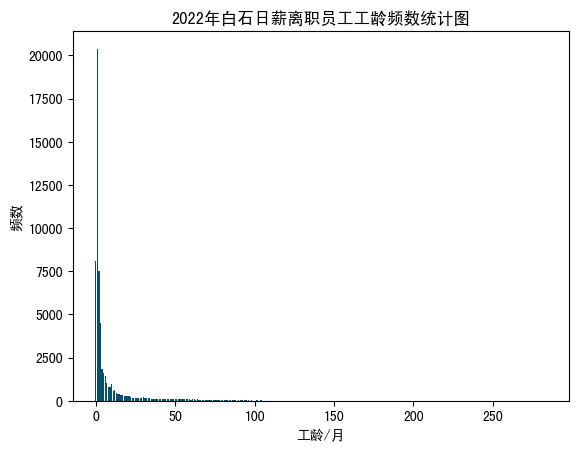

In [11]:
plt.bar(rixin_dimission_2022_data_group.index,rixin_dimission_2022_data_group.ryid,color='#084F6B')
plt.xlabel("工龄/月")
plt.ylabel("频数")
plt.title("2022年白石日薪离职员工工龄频数统计图")

Text(0.5, 1.0, '2022年白石离职日薪员工工龄档位频率统计')

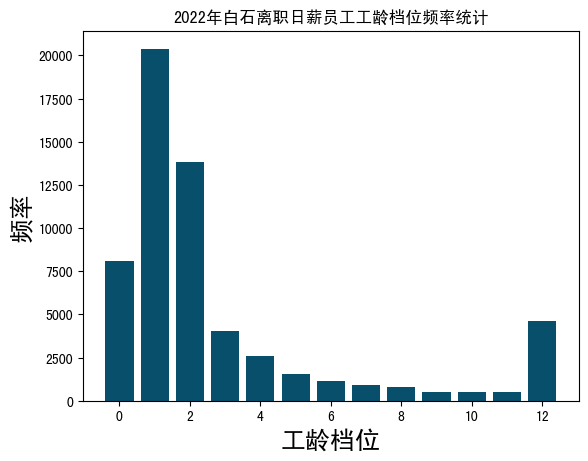

In [12]:
plt.bar(rixin_dimission_2022_data_working_month_level_group.index,rixin_dimission_2022_data_working_month_level_group.ryid,color='#084F6B')
plt.xlabel("工龄档位",fontsize=18)
plt.ylabel("频率",fontsize=18)
plt.title("2022年白石离职日薪员工工龄档位频率统计")

In [29]:
print(matplotlib.matplotlib_fname())

/home/cq/wp/a_ML/mission_rate/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [12]:
rixin_dimission_2022_data
rixin_dimission_2022_data[rixin_dimission_2022_data.duplicated(['ryid'], keep=False)]

,Unnamed: 0,ryid,per_gh,per_xm,per_sfzh,per_lzrq,per_outrq,per_outfs,per_jxfs,int_zhiji,per_zw,syb_id,per_syb,dpt_id,per_dpt,zhu_id,per_zhu,per_enroll_date,per_resign_date,working_month


In [20]:
rixin_dimission_2022_data.query("per_sfzh == '45092319910620721X'")

,Unnamed: 0,ryid,per_gh,per_xm,per_sfzh,per_lzrq,per_outrq,per_outfs,per_jxfs,int_zhiji,per_zw,syb_id,per_syb,dpt_id,per_dpt,zhu_id,per_zhu,per_enroll_date,per_resign_date,working_month
58,58,31282424,31282424,罗小林,45092319910620721X,2022-06-02,2022-07-04,辞职,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部,2022-06-02,2022-07-04,2
80591,80591,31304150,31304150,罗小林,45092319910620721X,2022-08-10,2022-08-19,自离,日薪,6,普工,1201,A事业一部,12020,C6B厂,1202007,生产部,2022-08-10,2022-08-19,1
118153,118153,1204086,1204086,罗小林,45092319910620721X,2021-03-10,2022-01-10,辞职,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部,2021-03-10,2022-01-10,4


In [ ]:
dimission_2022_data

,Unnamed: 0,ryid,per_gh,per_xm,per_sfzh,per_lzrq,per_outrq,per_outfs,per_jxfs,int_zhiji,per_zw,syb_id,per_syb,dpt_id,per_dpt,zhu_id,per_zhu
1,1,31293110,31293110,李中福,532531199712171819,2022-07-02,2022-07-05,自离1,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
2,2,1177984,1177984,杨存凤,532924198009081540,2020-08-27,2022-07-05,急辞,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
3,3,31279799,31279799,王丽萍,420983199810264446,2022-05-27,2022-07-05,辞职,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
4,4,31282419,31282419,何俊林,441502199712122633,2022-06-02,2022-07-05,辞职,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
17,17,31263497,31263497,梁刚,431225199005141815,2022-03-27,2022-06-28,急辞,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120865,120865,1029597,1029597,陈园园,511303198809094762,2019-04-17,2022-12-30,自离,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部
120866,120866,31257020,31257020,曹金香,622624200102281948,2022-02-26,2022-12-30,自离,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部
120867,120867,31310654,31310654,黄林彬,452126199706183618,2022-10-04,2022-12-30,急辞,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部
120868,120868,31314071,31314071,邹铁威,441424200001056316,2022-11-08,2022-12-30,急辞,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部


In [48]:
rixin = dimission_2022_data.query("per_jxfs == '日薪'")

In [17]:
pugong_dimission_2022_data.per_jxfs.unique()

array(['用掉', '日薪', '派遣', '精密', '深圳', '永湖', '三和', '特殊', '其他'], dtype=object)

In [43]:
pugong_dimission_2022_data.per_jxfs.unique()

array(['日薪'], dtype=object)

In [14]:
dimission_2022_data.per_zw.unique()

array(['普工', '测量员', 'OQC', '普工组长', '副主管', '安保技工', '带班组长', 'OC0技工',
       '生产副主管', '质检员', 'IPQC', '品质工程师', '助理工程师', '生产文员', '机械工程师', '人事统计',
       '数据统计', '实验室技工', '调机员', '体系高级工程师', '丝印工程师', '技工', '员工辅导组长', '主管',
       'PE工程师', 'NPI工程师', 'ERP统计', '清洁工', '测量工程师', 'ME高级工程师', '文控文员',
       '稽查员', 'QA文员', '一线跟单', '维修技工', '安保普工组长', '加硬工', '储备技术员', '储备技工',
       '品质助理工程师', '测试技工', '车间副主管', '品质技工', 'QE高级工程师', '物控文员', '装配技工',
       '车间主管', '文员', '员工辅导专员', '品质高级工程师', 'PIE工程师', 'PE高级工程师', 'QE工程师',
       '丝印技工', 'PE技工', '3D测量员', '移印技工', 'PE助理工程师', '绘图员', '环安稽查员', '生产技工',
       '系统技工', '调机技工', '计划工程师', '厂助', '安保工程师', 'IE工程师', 'ME技工', '后勤副主管',
       '工艺高级工程师', '工艺工程师', '外包技工', '储备精雕技工', '设备管理员', '技术员', '物料统计',
       '物料技工', '培训技工', '编程技术员', 'IPQC技工', '二线跟单', '生产主管', '品质主管', '副厂长',
       '精雕技工', '磨机技工', 'PIE技工', 'ME工程师', '包装副主管', 'IPQC稽查员', '安保稽查员',
       '品质文员', '储备干部', '厂长', '数据文员', '内包技工', '电工', '生产计划工程师', '测量副主管',
       '油墨监督员', '粗磨技工', '机械技工', '移印工程师', '镀膜技工', '7S技工', '环安工程师', 'QC副主

In [51]:
rixin[rixin.duplicated(['per_sfzh'])]

,Unnamed: 0,ryid,per_gh,per_xm,per_sfzh,per_lzrq,per_outrq,per_outfs,per_jxfs,int_zhiji,per_zw,syb_id,per_syb,dpt_id,per_dpt,zhu_id,per_zhu
1121,1121,31256924,31256924,兰鑫,360313199902082510,2022-02-25,2022-04-30,自离,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200105,品质部
3096,3096,31301985,31301985,付鹏,360428199412136010,2022-07-26,2022-11-28,自离,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
4452,4452,31280225,31280225,叶君,429001199701236934,2022-05-29,2022-06-02,自离1,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
4458,4458,31282404,31282404,陆兰,53262719950915378X,2022-06-02,2022-06-09,自离1,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
5066,5066,31305711,31305711,曾丽娟,622425199206208323,2022-08-24,2022-12-27,急辞,日薪,6,普工,1201,A事业一部,12001,A12-1厂,1200107,生产部
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120769,120769,31313729,31313729,杨梅,510524199704175503,2022-11-03,2022-12-29,辞职,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部
120846,120846,31313422,31313422,金海凤,41282619950620223X,2022-10-31,2022-12-30,辞职,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部
120858,120858,31267678,31267678,朱任座,532501199708132819,2022-04-17,2022-12-30,辞职,日薪,6,普工,1201,A事业一部,12025,F2厂,1202508,生产部
120862,120862,31310826,31310826,刁秋连,441622199508166269,2022-10-06,2022-12-30,辞职,日薪,6,普工,1201,A事业一部,12025,F2厂,1202505,品质部


In [33]:
pugong_dimission_2022_data.query("per_sfzh=='532326198410243024'")

,Unnamed: 0,ryid,per_gh,per_xm,per_sfzh,per_lzrq,per_outrq,per_outfs,per_jxfs,int_zhiji,per_zw,syb_id,per_syb,dpt_id,per_dpt,zhu_id,per_zhu
69171,69171,666109,666109,陈德燕,532326198410243024,2016-09-18,2022-03-07,外调,日薪,6,普工,1201,A事业一部,12016,A镀膜,1201602,A8镀膜A
114915,114915,31259340,31259340,陈德燕,532326198410243024,2016-09-18,2022-05-19,外调,精密,6,普工,1211,其他,12061,其他,1206105,其他园区


In [38]:
from datetime import date, datetime
from math import ceil


def cal_working_month_level(working_month: int) -> int:
    if working_month == 0:
        return 0
    if working_month >= 32:
        return 12
    return ceil((working_month + 2) / 3)

